In [2]:
import sys
import numpy as np
from nbodykit.lab import *
import h5py

snap_num = 99
config = {'nx' : 1024, 
          'xmax' : 205000.0, 
          'xmin' : 0.0,
          'input_dir' : '/global/cscratch1/sd/james12/Illustris_TNG_Data/Dark_Sims/snapdir_099/',
          'output_dir' : '/global/cscratch1/sd/james12/Illustris_TNG_Data/TNG_Density_Cubes/'}

#note: if we need bigfiles use BigFileCatalog instead of HDFCatalog and
#the file extension is .big

def compute_snap(snapnum, run_type):
    
    input_files_string = config['input_dir'] + 'snap_099.0.hdf5'
    output_file_string = config['output_dir'] + "density_cube_snap_099_full"
    
    if run_type=='dark':
        
        # DM
        f = HDFCatalog(input_files_string)
        f['Position'] = f['PartType1/Coordinates']
        m = f.to_mesh(config['nx'], config["xmax"] - config['xmin'])
        field = m.compute()
        np.save(output_file_string + "_dm.npy", field)
        
    elif run_type=='gas':

        # GAS
        f = HDFCatalog(input_files_string, root='PartType0')
        f['Position'] = f['Coordinates']
        m = f.to_mesh(config['nx'], config["xmax"] - config['xmin'])
        field = m.compute()
        np.save(output_file_string + "_gas.npy", field)
        
        
    elif run_type=='both':
            
        # DM
        f = HDFCatalog(input_files_string, root='PartType1')
        f['Position'] = f['Coordinates']
        m = f.to_mesh(config['nx'], config["xmax"] - config['xmin'])
        field = m.compute()
        np.save(output_file_string + "_dm.npy", field)

        # GAS
        f = HDFCatalog(input_files_string, root='PartType0')
        f['Position'] = f['Coordinates']
        m = f.to_mesh(config['nx'], config["xmax"] - config['xmin'])
        field = m.compute()
        np.save(output_file_string + "_gas.npy", field)
        
    else:
        raise ValueError("Please give a valid run_type ('dark', 'gas', or 'both')")
        


print("""\nComputing your density cubes for snap """ + str(snap_num) + '\n')

compute_snap(snap_num, 'dark')






Computing your density cubes for snap 99



In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
import yt 
plt.style.use('dark_background')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22
from nbodykit.lab import *

import mpl_scatter_density
# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


# Density Cube Data Preperation for CosmoMMF

### First Load in Density Cube

In [7]:
config = {'nx' : 1024, 
          'xmax' : 205000.0, 
          'xmin' : 0.0,
          'input_dir' : '/global/cscratch1/sd/james12/Illustris_TNG_Data/Full_Sims/snapdir_099/',
          'output_dir' : '/global/cscratch1/sd/james12/Illustris_TNG_Data/TNG_Density_Cubes/'}



data_string_full = config['output_dir'] + "density_cube_snap_099_full_all_species.npy"
data_string_dm = config['output_dir'] + 'Dark_Matter_Only/' + "density_cube_snap_099_full_dm.npy"

density_cube_full = np.load(data_string_full)
density_cube_dm = np.load(data_string_dm)

In [8]:
print(np.shape(density_cube))

(1024, 1024, 1024)


### Visualize Full Density Cube

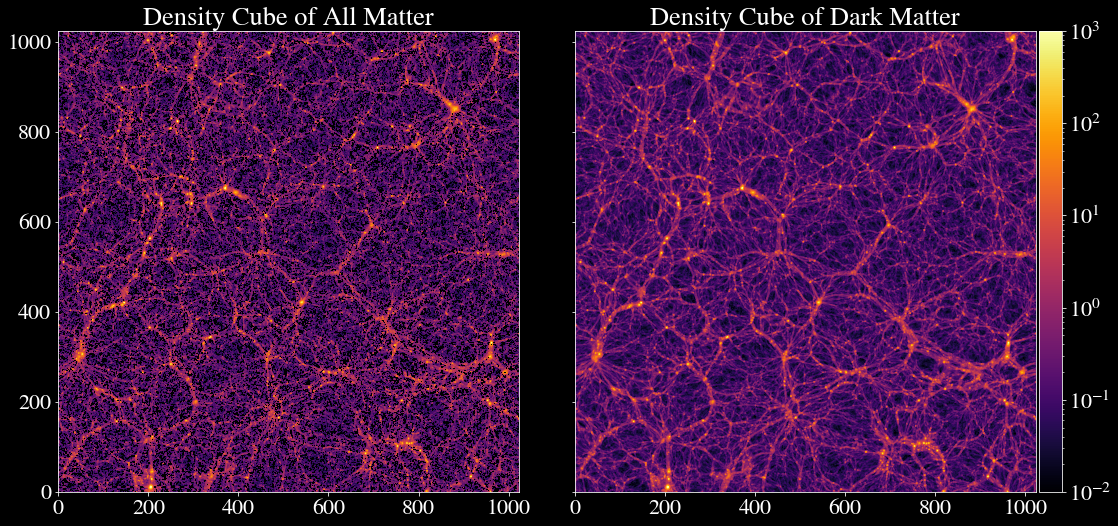

In [27]:
f, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(16,8))

ax1.set_title("Density Cube of All Matter")
im1 = ax1.imshow(density_cube_full[:,:,512], origin='lower', cmap='inferno', norm=mpl.colors.LogNorm(vmin=0.01, vmax=1000.0))
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
cax1.set_axis_off()
# plt.colorbar(im1, cax=cax1)

ax2.set_title("Density Cube of Dark Matter")
im2 = ax2.imshow(density_cube_dm[:,:,512], origin='lower', cmap='inferno', norm=mpl.colors.LogNorm(vmin=0.01, vmax=1000.0))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)

f.tight_layout()

### Density Cube Chopping

In [7]:
def chop_density_cube(density_cube_full):
    
    #chop density cube into 8ths
    density_cube_000 = density_cube_full[:512, :512, :512]
    density_cube_001 = density_cube_full[:512, :512, 512:]
    density_cube_010 = density_cube_full[:512, 512:, :512]
    density_cube_100 = density_cube_full[512:, :512, :512]
    density_cube_011 = density_cube_full[:512, 512:, 512:]
    density_cube_110 = density_cube_full[512:, 512:, :512]
    density_cube_101 = density_cube_full[512:, :512, 512:]
    density_cube_111 = density_cube_full[512:, 512:, 512:]
    
    #save chopped cubes
    np.save(config['output_dir'] + "density_cube_snap_099_dm_000.npy", density_cube_000)
    np.save(config['output_dir'] + "density_cube_snap_099_dm_001.npy", density_cube_001)
    np.save(config['output_dir'] + "density_cube_snap_099_dm_010.npy", density_cube_010)
    np.save(config['output_dir'] + "density_cube_snap_099_dm_100.npy", density_cube_100)
    np.save(config['output_dir'] + "density_cube_snap_099_dm_011.npy", density_cube_011)
    np.save(config['output_dir'] + "density_cube_snap_099_dm_110.npy", density_cube_110)
    np.save(config['output_dir'] + "density_cube_snap_099_dm_101.npy", density_cube_101)
    np.save(config['output_dir'] + "density_cube_snap_099_dm_111.npy", density_cube_111)
    
    
    
chop_density_cube(density_cube)